In [1]:
%run Classes.ipynb

In [5]:
%run Spotfire_Data_Extraction.ipynb

/var/folders/tc/_8w7cdmd2dvfv79kbrjbdgd40000gp/T/ipykernel_1627/305579041.py:61: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  flight_details_data = pd.read_csv(self.df_flight_details, parse_dates=['LegDepartureDateUtc'], date_parser = self.custom_date_parser)
/var/folders/tc/_8w7cdmd2dvfv79kbrjbdgd40000gp/T/ipykernel_1627/305579041.py:120: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  piece_information_data = pd.read_csv(self.df_piece_information, parse_dates = ['BookingSegmentFlightDateLT'], date_parser = self.custom_date_parser, converters=converters)
/var/folders/tc/_8w7cdmd2dvfv79kbrjbdgd40000gp/T/ipykernel_1627/305579041.py:145: FutureWarning: The argument 'date_parser' is de

In [7]:
filter_model = FilterData()

**Run the model for a specific month**

In [ ]:
 departure_airport = 'AMS'
 arrival_airport = 'IAH'
 month = 'FEB'
 year = '2024'

 filtered_flights = filter_model.per_month(departure_airport = departure_airport, arrival_airport = arrival_airport, 
                                           month = month, year = year)

 for flight_dir in filtered_flights:
     try:
         piece_information_csv = os.path.join(flight_dir, 'PieceInformation.csv')
         flight_information_csv = os.path.join(flight_dir, 'FlightInformation.csv')
         load_locations_csv = os.path.join(flight_dir, 'LoadLocations.csv')
         pax_information_csv = os.path.join(flight_dir, 'PaxInformation.csv')
         buildup_information_csv = os.path.join(flight_dir, 'BuildUpInformation.csv')

         project_setup = ProjectSetup()
         cargo, aircraft, EP, plot, data_analysis = project_setup.setup_project(piece_information_csv, flight_information_csv, 
                                                                 load_locations_csv, pax_information_csv, 
                                                                 buildup_information_csv, arrival_airport,
                                                                                restricted_locations={},
                                                                 baseline = False, optimized_actual = False)
        
         %run Model.ipynb


     except Exception as e:
         traceback.print_exc()
         continue

**Run the model for a specific flight**

Running the model for Flight KL0835 AMSSIN 28 JAN 2024
The model will run the following flight:
--------------------------------------------------------------------------------------------------------
Flight Number: KL835 PHBQB - Aircraft Type: 772 - Departure: AMS - Arrival: SIN - Date: 28 JAN 24

ZFW: 175824.1 kg - TOW: 264448.1 kg - LW: 182342.1 kg - OEW: 148261.0 kg

Fuel: 88624 kg - Trip Fuel: 82106 kg

Number of Cargo ULDs used: 7

Number of BAX ULDs: 9 - Number of BUP ULDs: 0 - Number of T ULDs: 1
--------------------------------------------------------------------------------------------------------
ULD set available for loading:
AKE-23, AKE
PMC-32, PMC
PMC-33, PMC
PMC-41, PMC
PMC-43, PMC
PAG-45, PAG
PAG-46, PAG
--------------------------------------------------------------------------------------------------------
BAX and BUP set for loading:
BAX-0, AKE
BAX-1, AKE
BAX-4, AKE
BAX-5, AKE
BAX-6, AKE
BAX-7, AKE
BAX-18, AKE
BAX-20, AKE
BAX-22, AKE
T-47, PMC
------------------------

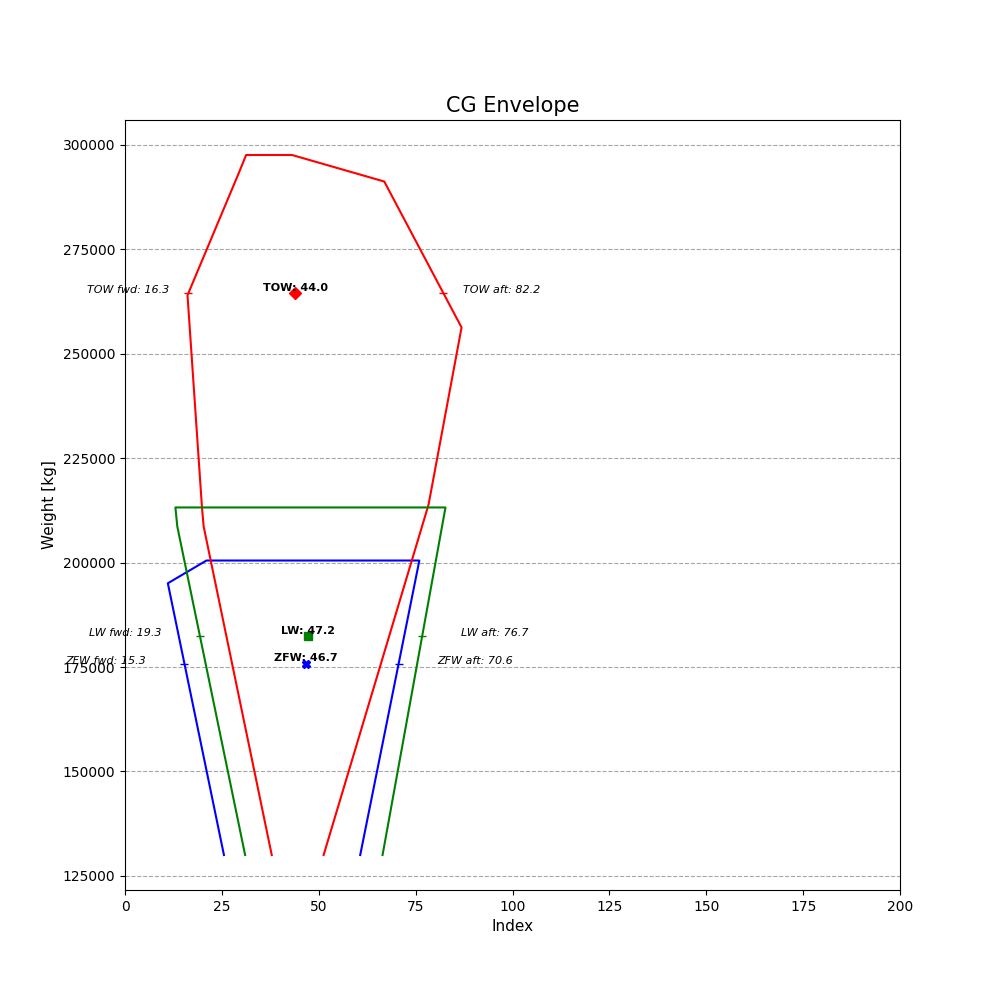

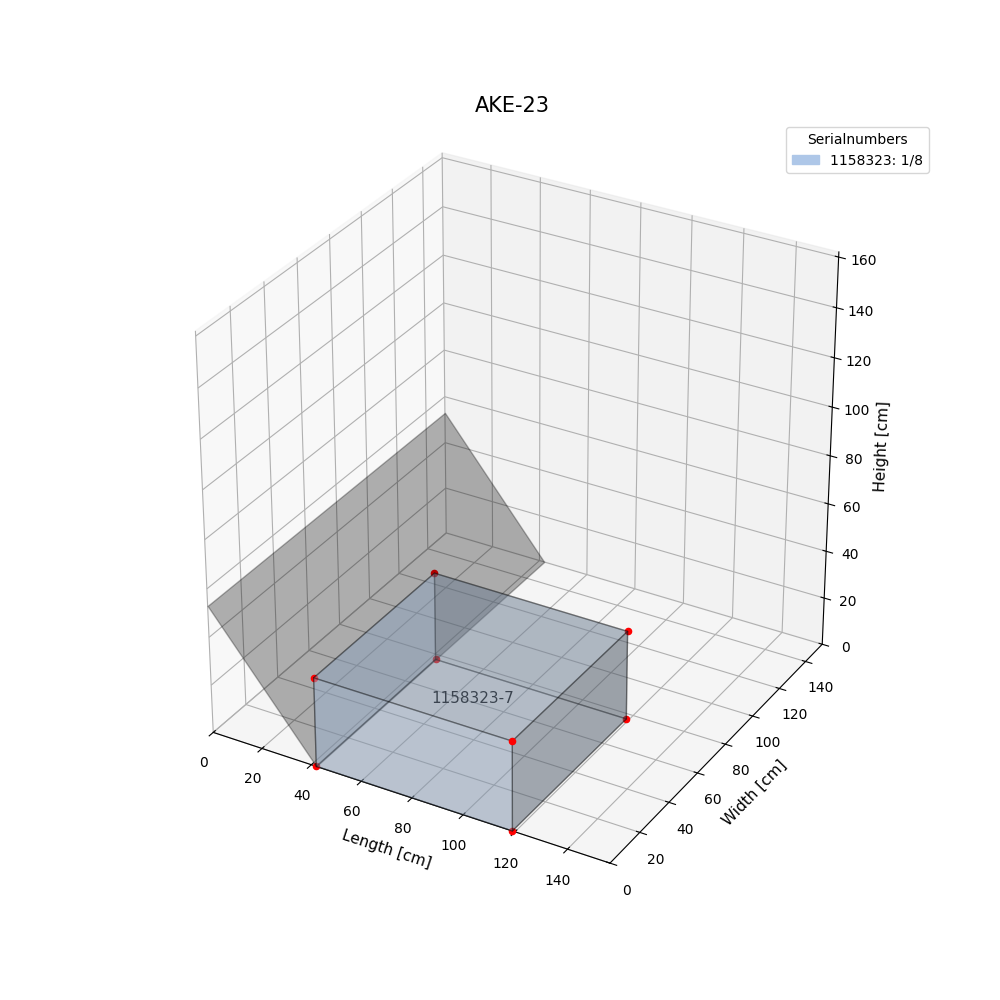

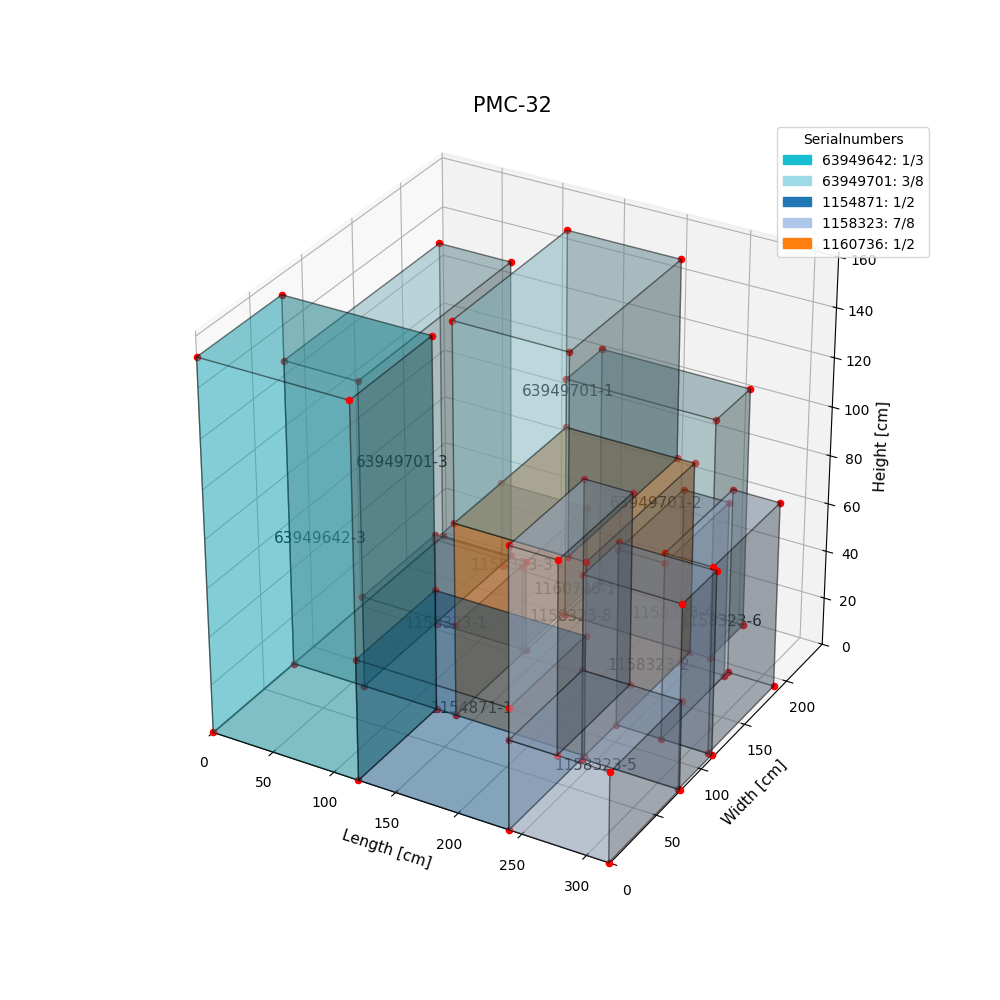

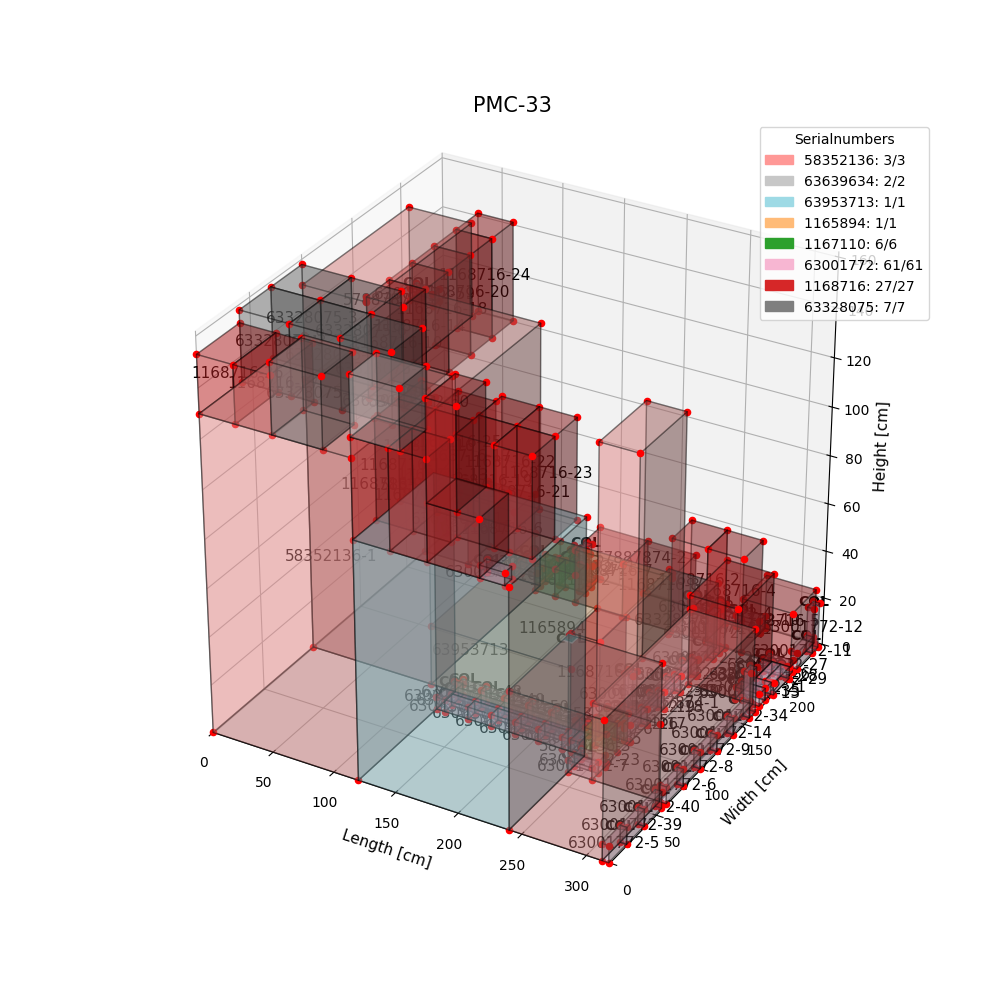

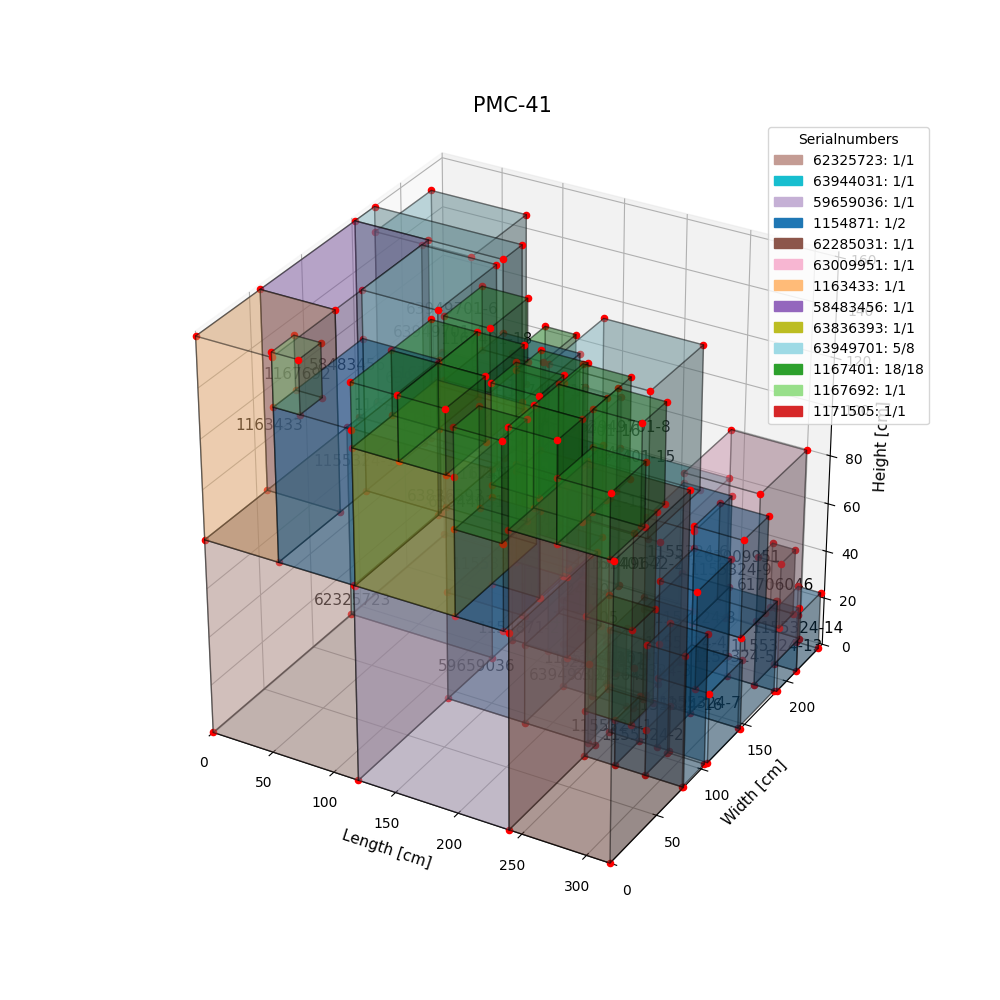

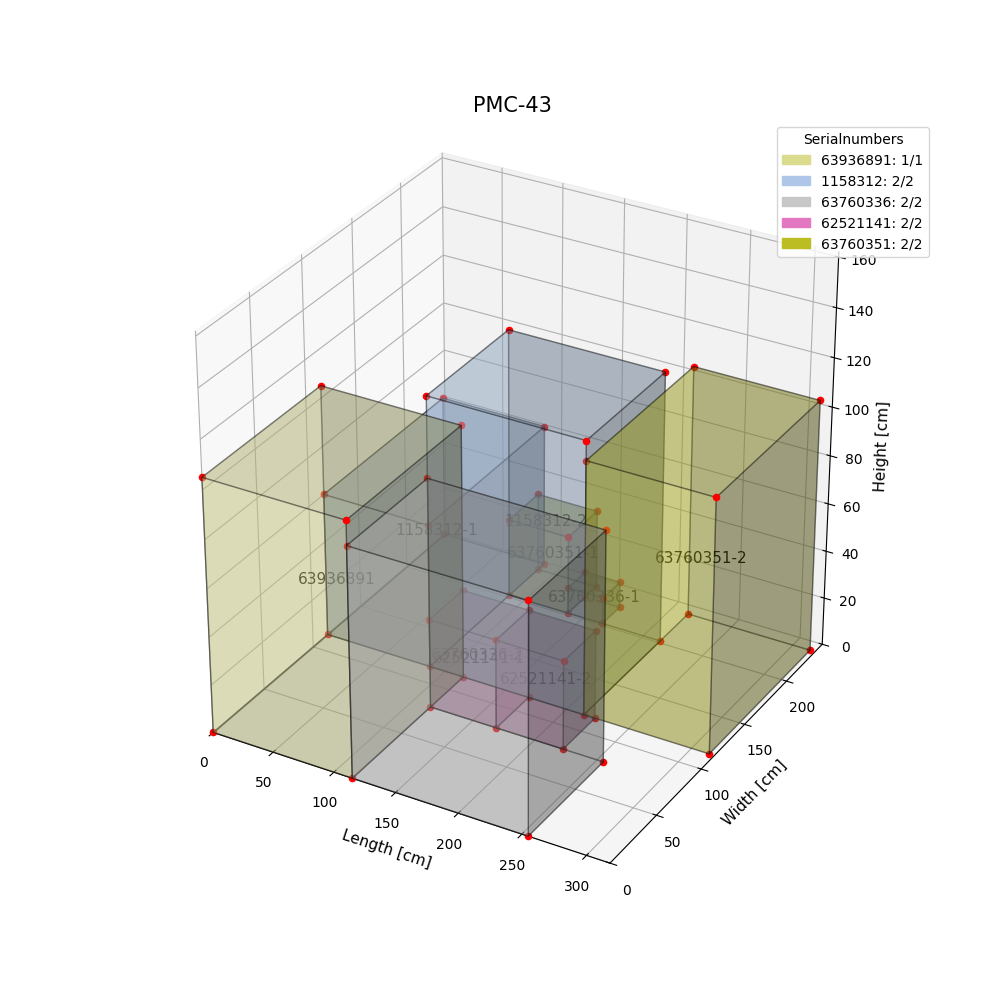

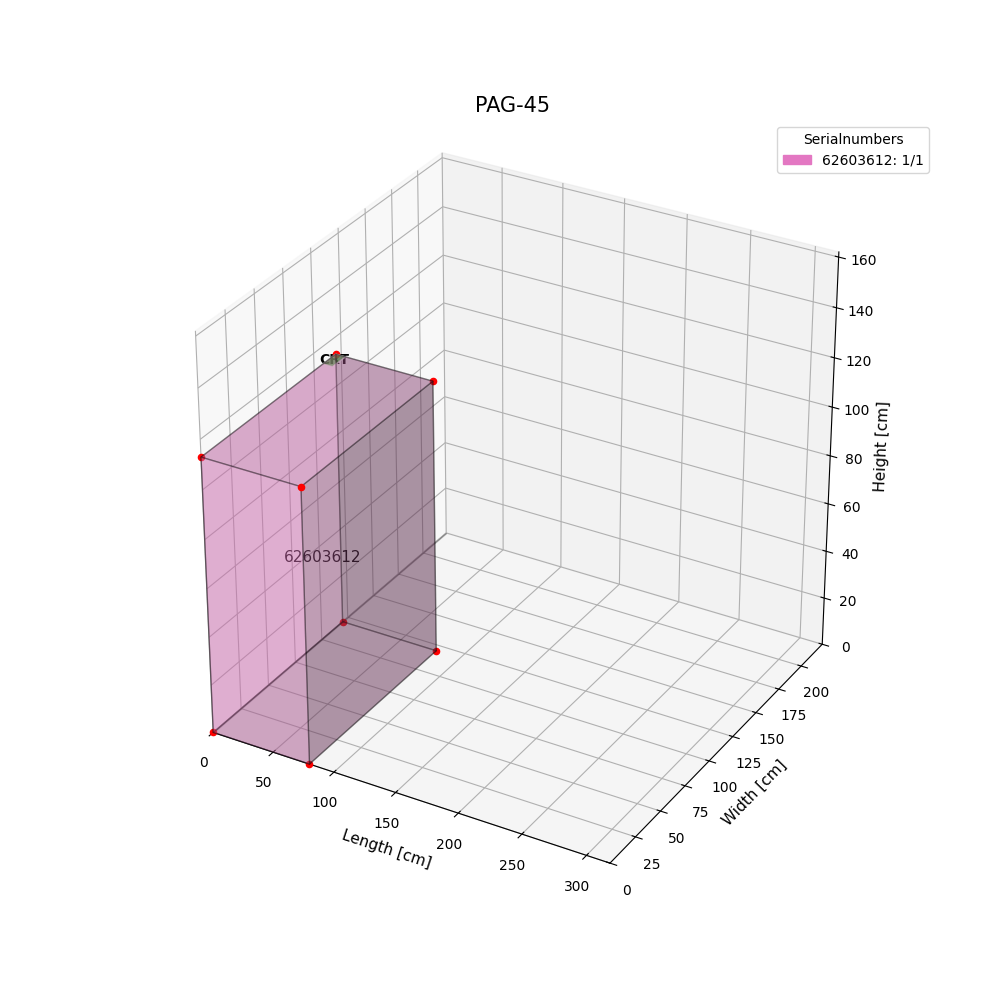

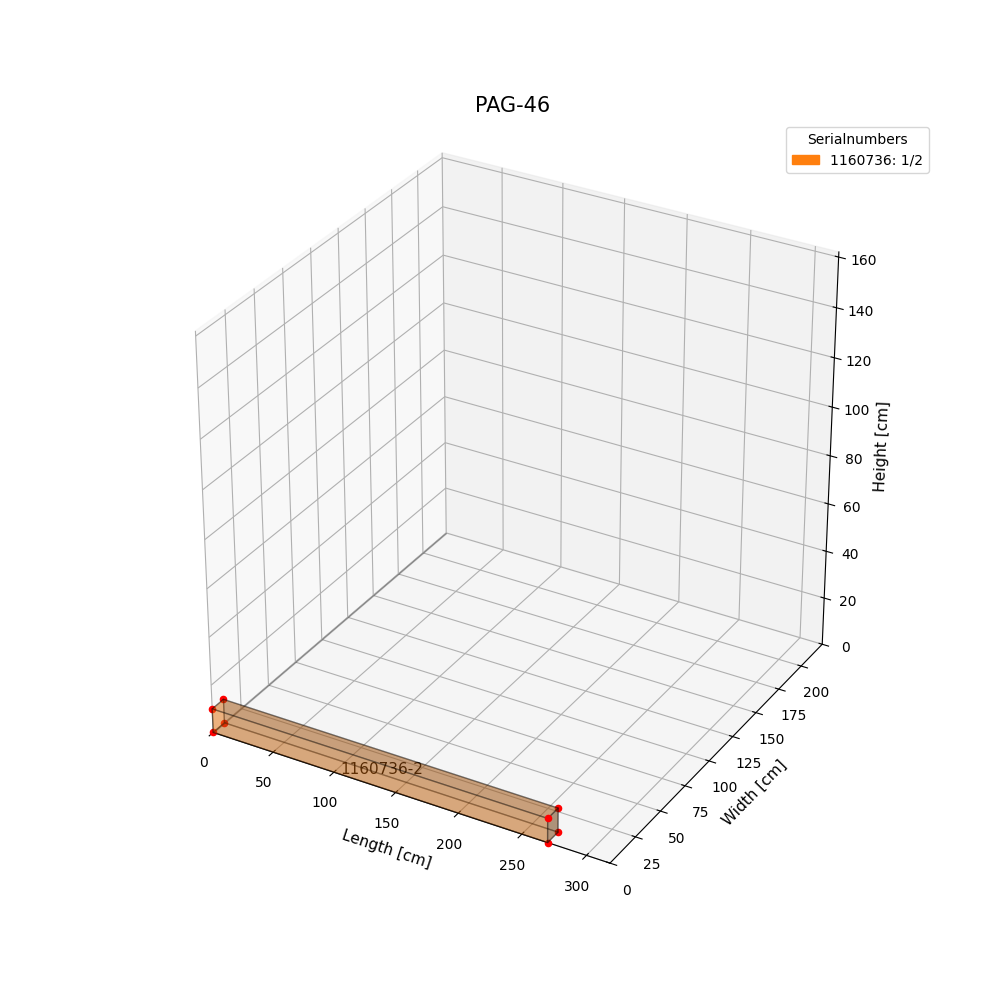

In [8]:
flight_number = 'KL0835'
departure_airport = 'AMS'
arrival_airport = 'SIN'
day = '28'
month = 'JAN'
year = '2024'
restricted_loadlocations = ['42L', '42R']

flight = filter_model.per_flight(flight_number = flight_number, departure_airport = departure_airport, arrival_airport = arrival_airport, day = day, month = month, year = year) 

try: 
    piece_information_csv = os.path.join(flight, 'PieceInformation.csv') 
    flight_information_csv = os.path.join(flight, 'FlightInformation.csv') 
    load_locations_csv = os.path.join(flight, 'LoadLocations.csv') 
    pax_information_csv = os.path.join(flight, 'PaxInformation.csv') 
    buildup_information_csv = os.path.join(flight, 'BuildUpInformation.csv') 

    project_setup = ProjectSetup() 
    cargo, aircraft, EP, plot, data_analysis = project_setup.setup_project(piece_information_csv, flight_information_csv,  
                                                        load_locations_csv, pax_information_csv,  
                                                        buildup_information_csv, arrival_airport, restricted_loadlocations, 
                                                        baseline = False, optimized_actual = False) 
 
    %run Model.ipynb 
  

except Exception as e: 
    print(f"An error occurred while processing flight {flight_number}:") 
    traceback.print_exc() 